### 典型数据分析案例

#### 实现报表自动化

In [27]:
import pandas as pd
from datetime import datetime
data =pd.read_csv(r"./file/order-14.1.csv",encoding="gbk",parse_dates=["成交时间"])  # parse_dates参数：将csv中的时间字符串转换成日期格式
data.head()

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206.0,915000003.0,CDNL,25.23,0.328,2018-01-01,20170103CDLG000210052759
1,30163281.0,914010000.0,CDNL,2.00,2.000,2018-01-02,20170103CDLG000210052759
2,30200518.0,922000000.0,CDNL,19.62,0.230,2018-01-03,20170103CDLG000210052759
3,29989105.0,922000000.0,CDNL,2.80,2.044,2018-01-04,20170103CDLG000210052759
4,30179558.0,915000100.0,CDNL,47.41,0.226,2018-01-05,20170103CDLG000210052759


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 7 columns):
商品ID    3478 non-null float64
类别ID    3478 non-null float64
门店编号    3478 non-null object
单价      3478 non-null float64
销量      3478 non-null float64
成交时间    3478 non-null datetime64[ns]
订单ID    3478 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 204.9+ KB


##### 计算本月相关指标

In [29]:
# 首先根据成交时间将本月的全部数据索引出来，然后在本月订单数据的基础上进行运算
This_month=data[(data["成交时间"]>= datetime(2018,2,1))&(data["成交时间"]<= datetime(2018,2,28))]
sales_1=(This_month["销量"]*This_month["单价"]).sum()  # 销售额计算
# 客流量计算
traffic_1=This_month["订单ID"].drop_duplicates().count()
s_t_1=sales_1/traffic_1  # 客单价计算
print("本月的销售额为：{:.2f},客流量为:{},客单价为：{:.2f}".format(sales_1,traffic_1,s_t_1))

本月的销售额为：10412.78,客流量为:343,客单价为：30.36


##### 计算上个月的相关指标

In [30]:
last_month=data[(data["成交时间"]>= datetime(2018,1,1))&(data["成交时间"]<= datetime(2018,1,31))]
sales_2=(last_month["销量"]*last_month["单价"]).sum()  # 销售额计算
# 客流量计算
traffic_2=last_month["订单ID"].drop_duplicates().count()
s_t_2=sales_2/traffic_2  # 客单价计算
print("上月的销售额为：{:.2f},客流量为:{},客单价为：{:.2f}".format(sales_2,traffic_2,s_t_2))

上月的销售额为：9940.97,客流量为:315,客单价为：31.56


##### 计算去年同期相关指标

In [31]:
same_month=data[(data["成交时间"]>= datetime(2017,2,1))&(data["成交时间"]<= datetime(2017,2,28))]
sales_3=(same_month["销量"]*same_month["单价"]).sum()  # 销售额计算
# 客流量计算
traffic_3=same_month["订单ID"].drop_duplicates().count()
s_t_3=sales_3/traffic_3  # 客单价计算
print("本月的销售额为：{:.2f},客流量为:{},客单价为：{:.2f}".format(sales_3,traffic_3,s_t_3))

本月的销售额为：8596.31,客流量为:262,客单价为：32.81


##### 利用函数提高编程效率

In [37]:
import pandas as pd
from datetime import datetime
data =pd.read_csv(r"./file/order-14.1.csv",encoding="gbk",parse_dates=["成交时间"])  # parse_dates参数：将csv中的时间字符串转换成日期格式
data.head()

same_month=data[(data["成交时间"]>= datetime(2017,2,1))&(data["成交时间"]<= datetime(2017,2,28))]
last_month=data[(data["成交时间"]>= datetime(2018,1,1))&(data["成交时间"]<= datetime(2018,1,31))]
This_month=data[(data["成交时间"]>= datetime(2018,2,1))&(data["成交时间"]<= datetime(2018,2,28))]

def get_month_data(data):
    sale = (data["单价"]*data["销量"]).sum()
    traffic = data["订单ID"].drop_duplicates().count()  # drop_duplicates()去重操作
    s_t = sale/traffic
    return(sale,traffic,s_t)

# 计算本月
sale_1,traffic_1,s_t_1 = get_month_data(This_month)
# 计算上月
sale_2,traffic_2,s_t_2 = get_month_data(last_month)
# 计算去年同期相关指标
sale_3,traffic_3,s_t_3 = get_month_data(same_month)

report = pd.DataFrame([[sale_1,sale_2,sale_3],[traffic_1,traffic_2,traffic_3],[s_t_1,s_t_2,s_t_3]],
                      columns=["本月累计","上月同期","去年同期"],index=["销售额","客流量","客单量"])
report


,本月累计,上月同期,去年同期
销售额,10412.780070,9940.972910,8596.313470
客流量,343.000000,315.000000,262.000000
客单量,30.357959,31.558644,32.810357


In [38]:
report["环比"]=report["本月累计"]/report["上月同期"]-1
report["同比"]=report["本月累计"]/report["去年同期"]-1
report

,本月累计,上月同期,去年同期,环比,同比
销售额,10412.780070,9940.972910,8596.313470,0.047461,0.211308
客流量,343.000000,315.000000,262.000000,0.088889,0.309160
客单量,30.357959,31.558644,32.810357,-0.038046,-0.074745


#### 某连锁超市的数据分析师

In [42]:
data =pd.read_csv(r"./file/order-14.1.csv",encoding="gbk",parse_dates=["成交时间"])   # 导入数据

# 查看哪些类别的商品比较畅销
data.groupby("类别ID")["销量"].sum().reset_index()

,类别ID,销量
0,910000000.0,24.0
1,910010000.0,7.0
2,910010002.0,1.0
3,910010101.0,6.0
4,910010301.0,2.0
...,...,...
363,936030100.0,1.0
364,936050100.0,1.0
365,936080103.0,1.0
366,938030000.0,8.0


In [43]:
# 对销量做降序排列，取前10行
data.groupby("类别ID")["销量"].sum().reset_index().sort_values(by="销量",ascending=False).head(10)

,类别ID,销量
240,922000003.0,425.328
239,922000002.0,206.424
251,923000006.0,190.294
216,915030104.0,175.059
238,922000001.0,121.355
367,960000000.0,121.000
234,920090000.0,111.565
249,923000002.0,91.847
237,922000000.0,86.395
247,923000000.0,85.845


In [45]:
#哪些商品比较畅销 ---与计算哪些类别比较畅销的逻辑一致  ，通过透视表来计算哪些商品比较畅销，同样取前10的商品
pd.pivot_table(data,index="商品ID",values="销量",aggfunc = "sum").reset_index().sort_values(by="销量",ascending=False).head(10)

,商品ID,销量
8,29989059.0,391.549
18,29989072.0,102.876
469,30022232.0,101.000
523,30031960.0,99.998
57,29989157.0,72.453
476,30023041.0,64.416
505,30026255.0,62.375
7,29989058.0,56.052
510,30027007.0,48.757
903,30171264.0,45.000


In [46]:
# 不同门店的销售额比
data["销售额"]=data["销量"]*data["单价"]    # 在数据中新增一个销售额的字段
data.groupby("门店编号")["销售额"].sum()   # 按门店编号进行分组，对分组后的营业额求和运算

门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64

In [47]:
data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()  # 计算不同门店的销售额占比

门店编号
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 销售额, dtype: float64

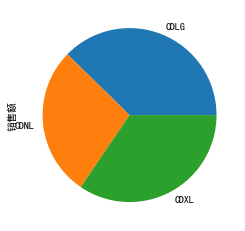

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  

# 绘制饼图
(data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()).plot.pie()

In [63]:

data =pd.read_csv(r"./file/order-14.3.csv",encoding="gbk",parse_dates=["成交时间"])  
# 哪些时间段是超市的客流高峰期
 # 需要先找到客流量

# 利用自定义时间格式函数 strftime 提取小时数
data["小时"]=data["成交时间"].map(lambda x:int(x.strftime("%H")))
# 对小时和订单去重
traffic = data[["小时","订单ID"]].drop_duplicates()
# 求每个小时的客流量
traffic.groupby("小时")["订单ID"].count()

小时
6      10
7      37
8     106
9     156
10    143
11     63
13     30
14     36
15     17
16     50
17     73
18     71
19     71
20     39
21     16
Name: 订单ID, dtype: int64

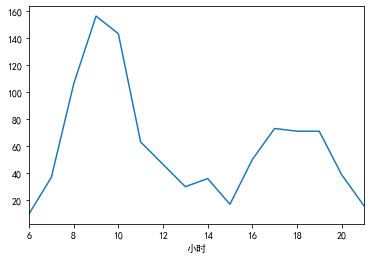

In [64]:
traffic.groupby("小时")["订单ID"].count().plot()

#### 某银行的数据分析师

In [67]:
data = pd.read_csv(r"./file/loan.csv",encoding="gbk")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [69]:
# 是不是收入越高的人坏账率越低
data=data.fillna({"月收入":data["月收入"].mean()})  #  对缺失值进行处理，使用均值填充法
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [70]:
# 月收入属于连续值，对连续值进行分析时，我们一般都会将连续值离散化，就是将连续值进行区间划分，分成若干类别
cut_bins=[0,5000,10000,15000,20000,100000]
income_cut =pd.cut(data["月收入"],cut_bins)
income_cut

0           (5000, 10000]
1               (0, 5000]
2               (0, 5000]
3               (0, 5000]
4         (20000, 100000]
               ...       
149995          (0, 5000]
149996      (5000, 10000]
149997      (5000, 10000]
149998      (5000, 10000]
149999      (5000, 10000]
Name: 月收入, Length: 150000, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 100000]]

In [71]:
# 区间分好，看每个区间的坏账率，坏账率就是所有借款用户中逾期不还用户的占比。逾期不还用户的好坏客户字段标记为1，非逾期不还用户的好坏客户字段标记为0；
# 坏账率等于好坏客户字段之和（坏账客户数）与好坏客户字段的计数（所有借款用户）的比值
all_income_user=data["好坏客户"].groupby(income_cut).count()
bad_income_user=data["好坏客户"].groupby(income_cut).sum()
bad_rate=bad_income_user/all_income_user
bad_rate

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好坏客户, dtype: float64

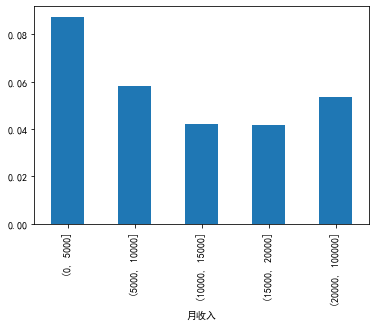

In [72]:
bad_rate.plot.bar()

In [74]:
# 年龄和坏账率有关系吗

#年龄也是连续值，把其连续值进行离散化处理
age_cut = pd.qcut(data["年龄"],6)
all_age_user = data["好坏客户"].groupby(age_cut).count()
bad_age_user = data["好坏客户"].groupby(age_cut).sum()
bad_rate=bad_age_user/all_age_user
bad_rate

年龄
(-0.001, 37.0]    0.108201
(37.0, 45.0]      0.086841
(45.0, 52.0]      0.078956
(52.0, 59.0]      0.059600
(59.0, 67.0]      0.039205
(67.0, 109.0]     0.022498
Name: 好坏客户, dtype: float64

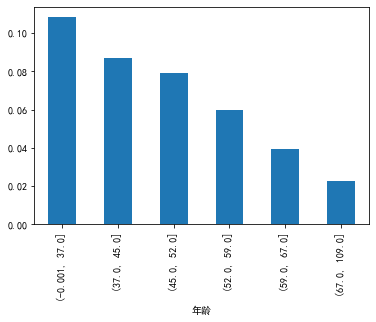

In [75]:
bad_rate.plot.bar()

In [79]:
# 家庭人口数量和坏账率有什么关系
#虽然人口数量也是连续值，但因为数量不是很大，所以我们当做离散值进行处理
all_age_user = data.groupby("家属数量")["好坏客户"].count()
bad_age_user = data.groupby("家属数量")["好坏客户"].sum()
bad_rate=bad_age_user/all_age_user
bad_rate

家属数量
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: 好坏客户, dtype: float64

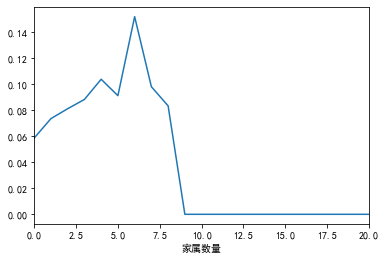

In [78]:
bad_rate.plot()